# Import necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib        #        (  for model persistence )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the dataset

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/CODSOFT/fraud-detection/train/fraudTrain.csv")
test_df = pd.read_csv("/content/drive/MyDrive/CODSOFT/fraud-detection/test/fraudTest.csv")


In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Data preprocessing

Removing unwanted columns

In [ ]:
to_drop = ['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'trans_num', 'unix_time', 'street', 'category']
train_df.drop(columns=to_drop, inplace=True)
test_df.drop(columns=to_drop, inplace=True)

Calculate distance features

In [ ]:
train_df['lat_dist'] = abs(round(train_df['merch_lat'] - train_df['lat'], 2))
train_df['long_dist'] = abs(round(train_df['merch_long'] - train_df['long'], 2))

test_df['lat_dist'] = abs(round(test_df['merch_lat'] - test_df['lat'], 2))
test_df['long_dist'] = abs(round(test_df['merch_long'] - test_df['long'], 2))

In [ ]:
cols_to_drop = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long', 'state']
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

#Data Visualization:


 Plotting a histogram of the 'lat_dist' feature

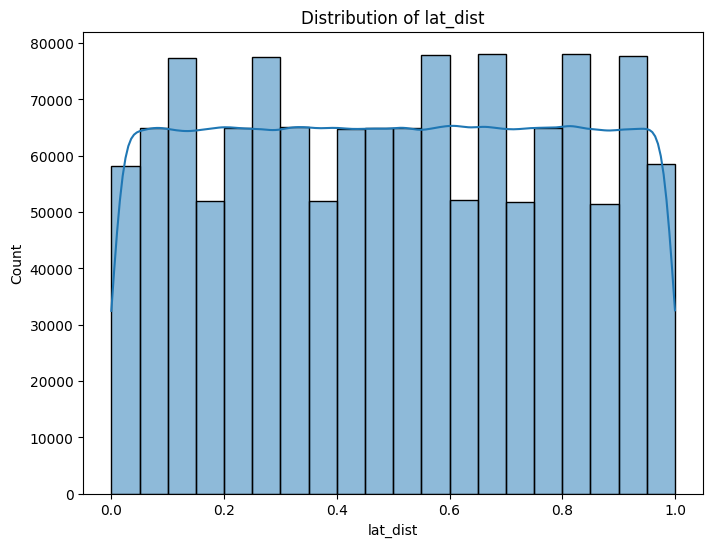

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(train_df['lat_dist'], bins=20, kde=True)
plt.title('Distribution of lat_dist')
plt.xlabel('lat_dist')
plt.ylabel('Count')
plt.show()

correlation matrix as a heatmap

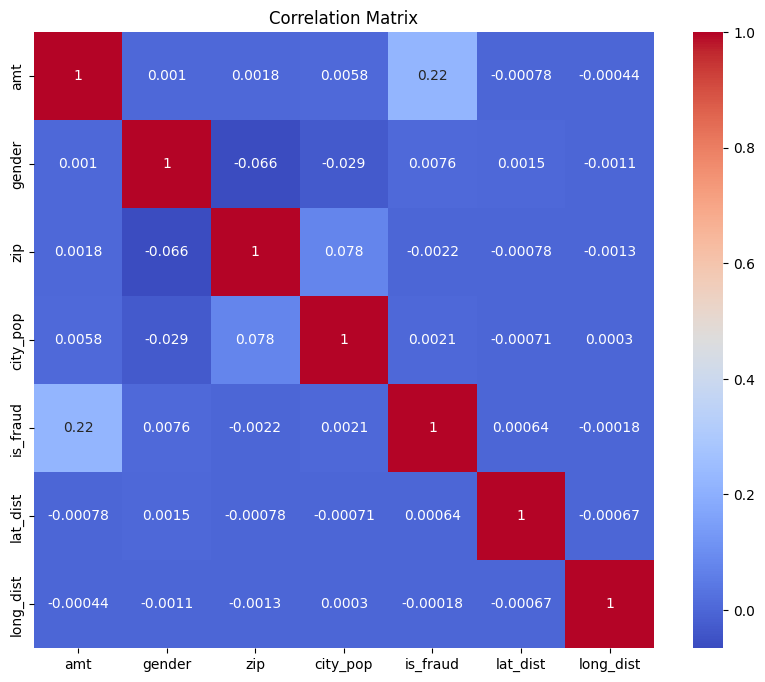

In [ ]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 Box plot for transaction amounts

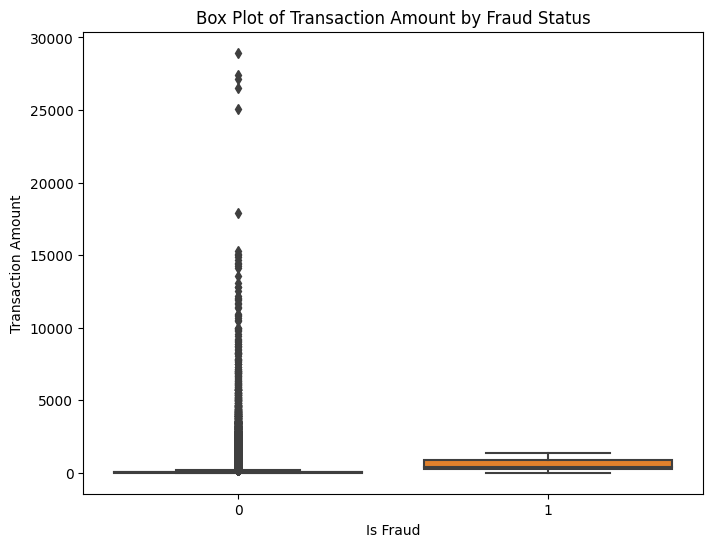

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_df)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

Violin plot for 'amt' by fraud status

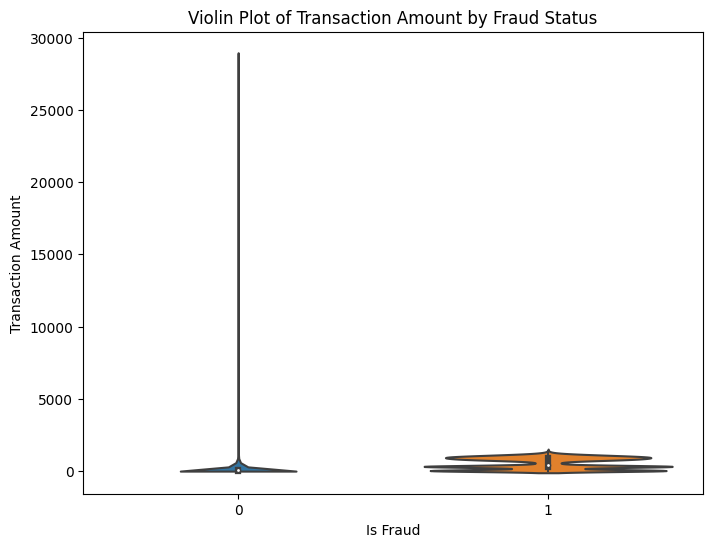

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_fraud', y='amt', data=train_df)
plt.title('Violin Plot of Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

Count plot for the 'gender' feature

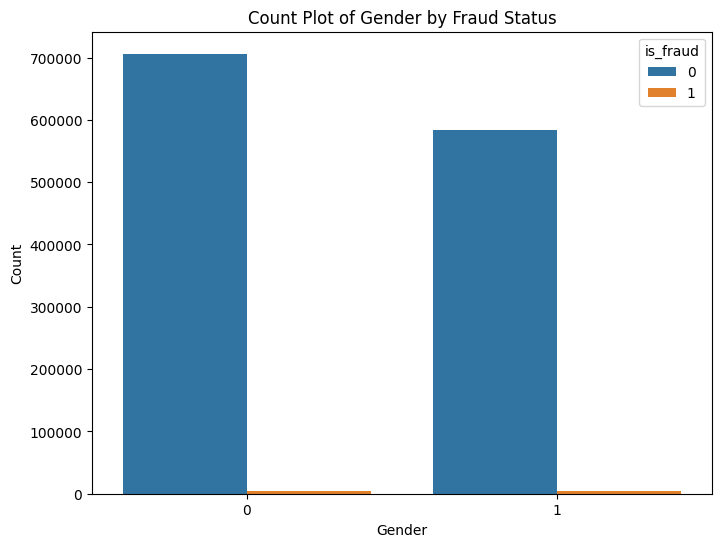

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=train_df, hue='is_fraud')
plt.title('Count Plot of Gender by Fraud Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Pie chart for the 'gender' feature

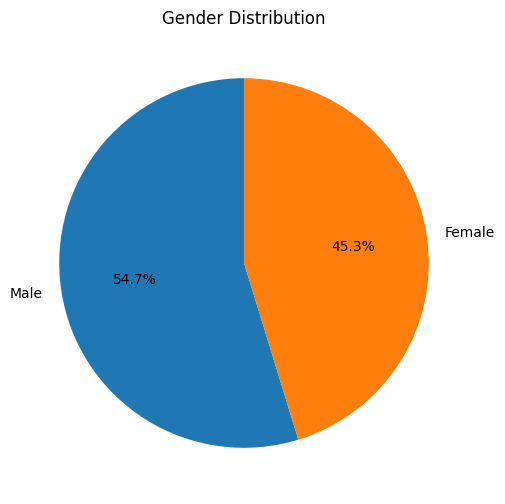

In [ ]:
gender_distribution = train_df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


Create a scatter plot to visualize relationships

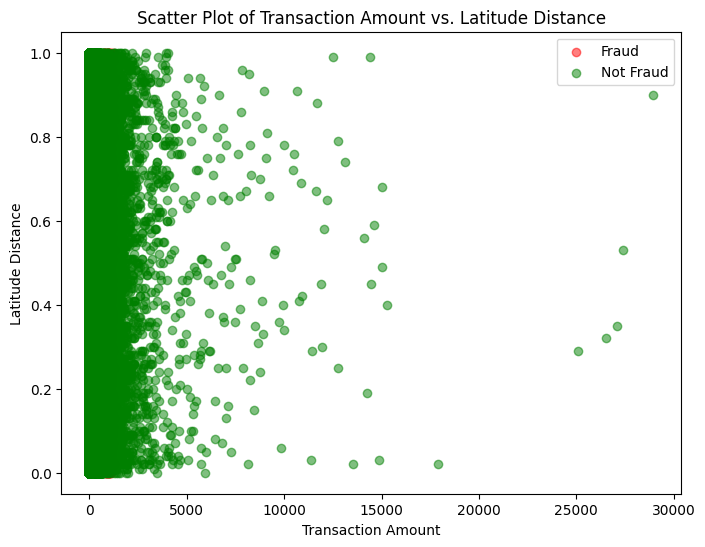

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(train_df[train_df['is_fraud'] == 1]['amt'], train_df[train_df['is_fraud'] == 1]['lat_dist'], c='red', label='Fraud', alpha=0.5)
plt.scatter(train_df[train_df['is_fraud'] == 0]['amt'], train_df[train_df['is_fraud'] == 0]['lat_dist'], c='green', label='Not Fraud', alpha=0.5)
plt.title('Scatter Plot of Transaction Amount vs. Latitude Distance')
plt.xlabel('Transaction Amount')
plt.ylabel('Latitude Distance')
plt.legend()
plt.show()

Side-by-side histograms for selected features by fraud status

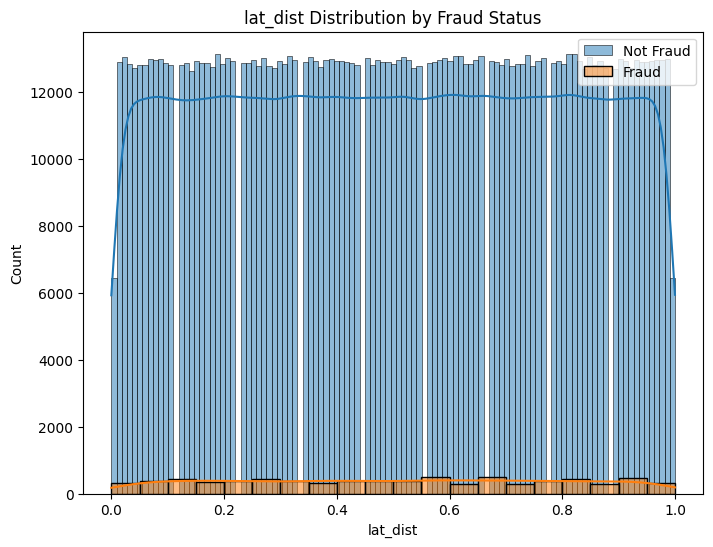

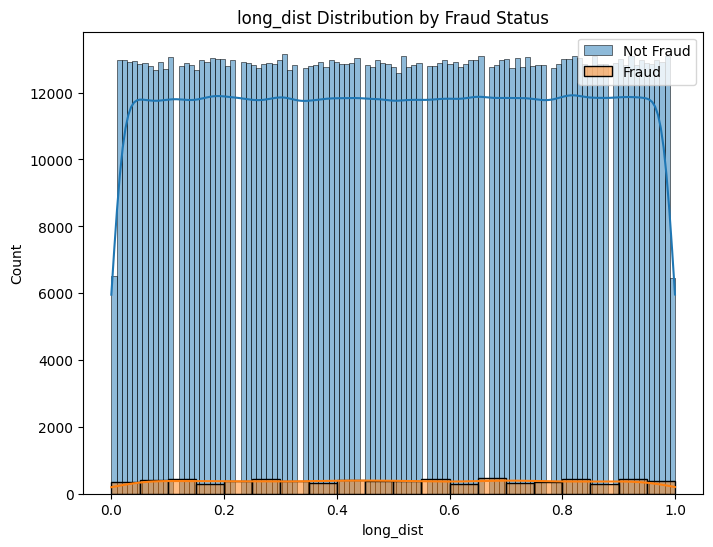

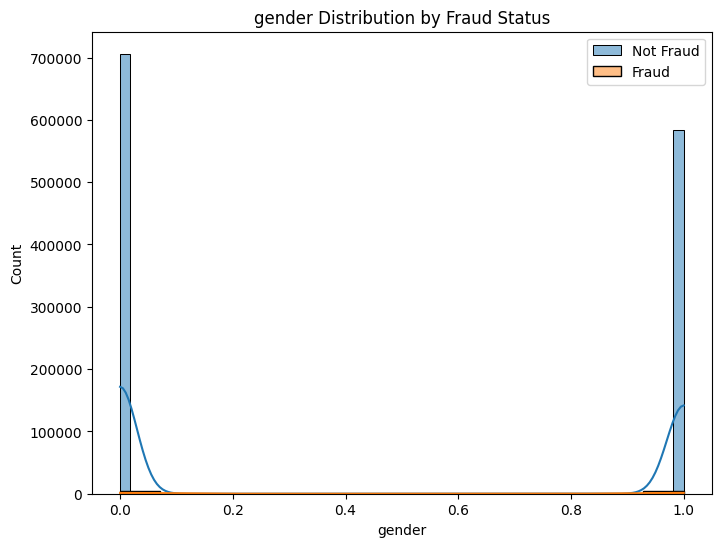

In [ ]:

features_to_compare = ['lat_dist', 'long_dist', 'gender']
for feature in features_to_compare:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[train_df['is_fraud'] == 0][feature], kde=True, label='Not Fraud')
    sns.histplot(train_df[train_df['is_fraud'] == 1][feature], kde=True, label='Fraud')
    plt.title(f'{feature} Distribution by Fraud Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()


#Data Analysis:

Summary statistics

In [ ]:
summary_stats = train_df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                amt        gender           zip      city_pop      is_fraud  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   7.035104e+01  4.525513e-01  4.880067e+04  8.882444e+04  5.788652e-03   
std    1.603160e+02  4.977437e-01  2.689322e+04  3.019564e+05  7.586269e-02   
min    1.000000e+00  0.000000e+00  1.257000e+03  2.300000e+01  0.000000e+00   
25%    9.650000e+00  0.000000e+00  2.623700e+04  7.430000e+02  0.000000e+00   
50%    4.752000e+01  0.000000e+00  4.817400e+04  2.456000e+03  0.000000e+00   
75%    8.314000e+01  1.000000e+00  7.204200e+04  2.032800e+04  0.000000e+00   
max    2.894890e+04  1.000000e+00  9.978300e+04  2.906700e+06  1.000000e+00   

           lat_dist     long_dist  
count  1.296675e+06  1.296675e+06  
mean   5.002665e-01  5.003369e-01  
std    2.885977e-01  2.889009e-01  
min    0.000000e+00  0.000000e+00  
25%    2.500000e-01  2.500000e-01  
50%    5.000000e-01  5.000000e-01  
75%    7.500000e

Distribution of the target variable

In [ ]:
target_distribution = train_df['is_fraud'].value_counts()
print("\nTarget Variable Distribution:")
print(target_distribution)



Target Variable Distribution:
0    1289169
1       7506
Name: is_fraud, dtype: int64


# Encode gender as 0 and 1

In [ ]:
train_df['gender'] = [1 if value == "M" else 0 for value in train_df['gender']]
test_df['gender'] = [1 if value == "M" else 0 for value in test_df['gender']]


Split the data into features and target

In [ ]:
X_train = train_df.drop('is_fraud', axis=1)
X_test = test_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
y_test = test_df['is_fraud']


Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Model training

In [ ]:
# The Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# The Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

# Save the models

In [ ]:
joblib.dump(lr, '/content/drive/MyDrive/savedmodels/logistic_regression_model.pkl')
joblib.dump(rfc, '/content/drive/MyDrive/savedmodels/random_forest_model.pkl')

['/content/drive/MyDrive/savedmodels/random_forest_model.pkl']

In [ ]:
# Load the models from your Google Drive (for future use)
lr = joblib.load('/content/drive/MyDrive/savedmodels/logistic_regression_model.pkl')
rfc = joblib.load('/content/drive/MyDrive/savedmodels/random_forest_model.pkl')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model evaluation

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print(f'Logistic Regression Model Accuracy: {accuracy_lr:.2f}')
print(f'Random Forest Model Accuracy: {accuracy_rfc:.2f}')


Logistic Regression Model Accuracy: 1.00
Random Forest Model Accuracy: 1.00
